In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

# CMD diagram

In [6]:
CLUSTER_NAME: str = 'King 11'

In [7]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [8]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [9]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [10]:
lit.link_bibcode.unique()

array(['2018A&A...618A..93C'], dtype=object)

In [11]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,0,2211121834828358528,3,NaN,1636148068921376768,Gaia DR3 2211121834828358528,2211121834828358528,1161687180,2016.0,-3.222717,...,3.582699,2.248619,1.330393,0.858373,0.612384,0.015728,2.524399,0.440766,0.117419,0.30
1,1,2211122045287064320,3,NaN,1636148068921376768,Gaia DR3 2211122045287064320,2211122045287064320,349538297,2016.0,-3.193050,...,3.602076,2.260780,1.337588,0.863015,1.110911,0.003310,0.247588,0.166621,0.158199,0.85
2,2,2211122045287373312,3,NaN,1636148068921376768,Gaia DR3 2211122045287373312,2211122045287373312,1377041690,2016.0,-3.188447,...,3.602076,2.260780,1.337588,0.863015,1.131225,0.002166,-0.324878,0.137461,0.157659,1.00
3,3,2211122182726015232,3,NaN,1636148068921376768,Gaia DR3 2211122182726015232,2211122182726015232,1758264312,2016.0,-3.114499,...,3.406311,2.137912,1.264893,0.816112,1.039132,0.002248,-0.070783,0.142924,0.143648,1.00
4,4,2211122251445485696,3,NaN,1636148068921376768,Gaia DR3 2211122251445485696,2211122251445485696,1680873279,2016.0,-3.102028,...,3.328005,2.088764,1.235815,0.797351,1.050470,0.010714,2.390858,0.264054,0.149320,0.90


In [12]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [13]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

2018A&A...618A..93C    1
Name: link_bibcode, dtype: int64

In [14]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

In [35]:
found.occurences.value_counts()

1.00    29
0.90    10
0.95     8
0.55     6
0.70     6
0.75     6
0.80     6
0.85     6
0.25     6
0.65     5
0.15     5
0.50     5
0.60     5
0.30     4
0.45     4
0.35     4
0.20     2
0.40     1
0.05     1
0.10     1
Name: occurences, dtype: int64

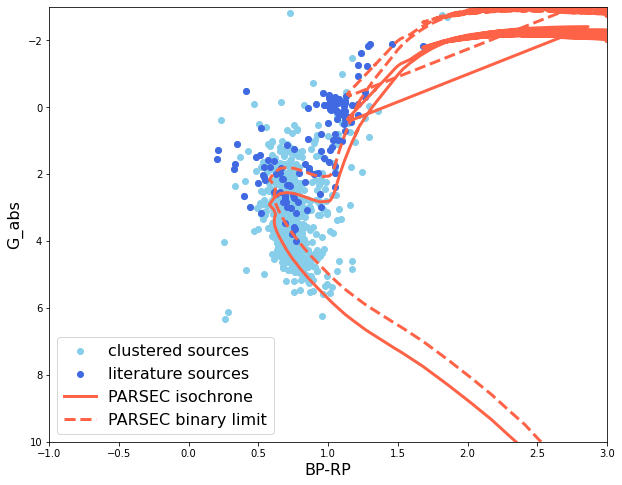

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [16]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

1 literature sources were not clustered.


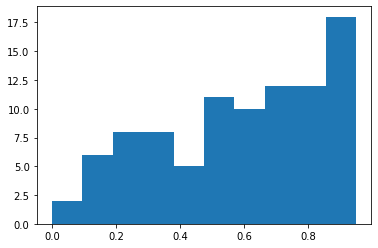

In [17]:
plt.hist(not_found.occurences);

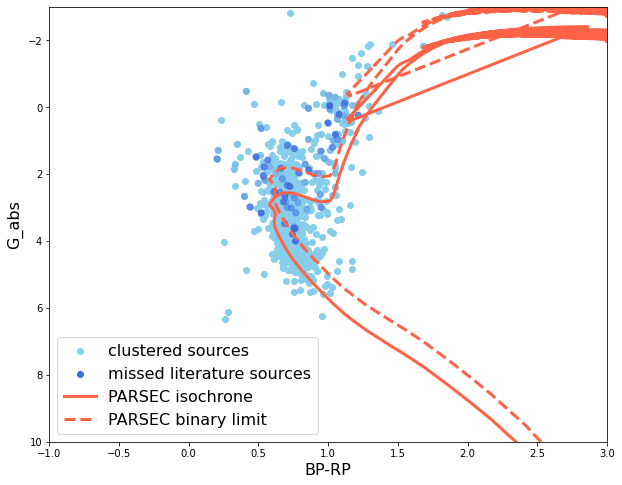

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue',
            label='missed literature sources', alpha=1-not_found['occurences'])
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [19]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [20]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=50)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [21]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


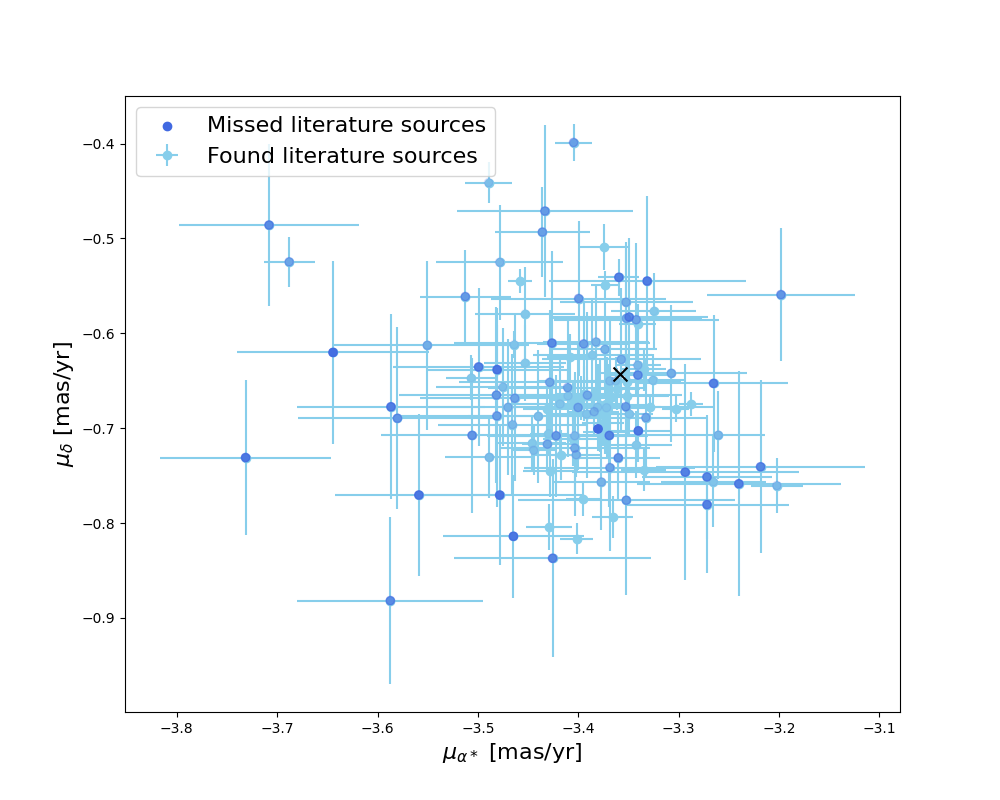

In [23]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.scatter(not_found.pmra, not_found.pmdec, alpha=1-not_found.occurences, color='royalblue', zorder=1,
             label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [24]:
tot_not_found = not_found[not_found.occurences==0]
PMRA_STD = np.std(np.abs(found.pmra-cp_pmra))
PMDEC_STD = np.std(np.abs(found.pmdec-cp_pmdec))

correct_pm_mask = (np.abs(tot_not_found.pmra-cp_pmra)<=6*PMRA_STD) & (np.abs(tot_not_found.pmdec-cp_pmdec)<=6*PMDEC_STD)
len(tot_not_found[correct_pm_mask])
correct_pm = tot_not_found[correct_pm_mask]

In [27]:
correct_pm

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences,link_bibcode
15,60,2211218248254555392,3,NaN,1636148068921376768,Gaia DR3 2211218248254555392,2211218248254555392,427516412,2016.0,-2.665179,...,2.312361,1.368106,0.882705,1.011292,0.003765,-0.044521,0.14962,0.160582,0.0,2018A&A...618A..93C


<IPython.core.display.Javascript object>


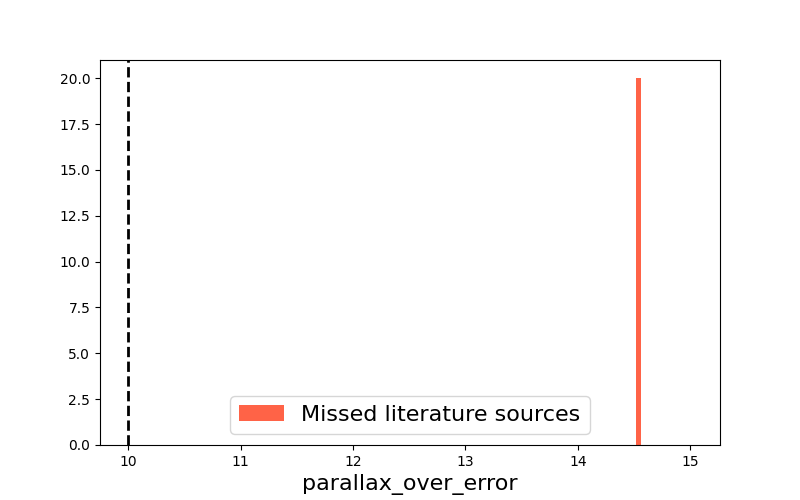

In [26]:
not_found_hist(tot_not_found, 'parallax_over_error', 10.0);

<IPython.core.display.Javascript object>


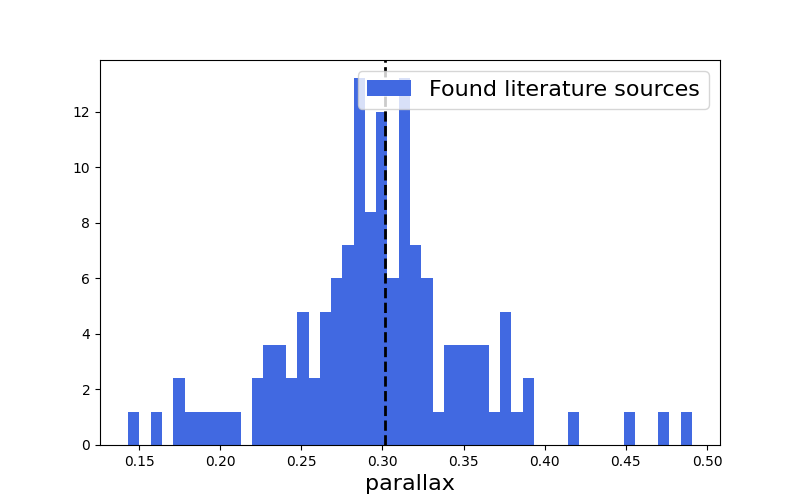

In [29]:
found_vs_not_found_hist_xlines(found, tot_not_found.parallax.values, 'parallax')

<IPython.core.display.Javascript object>


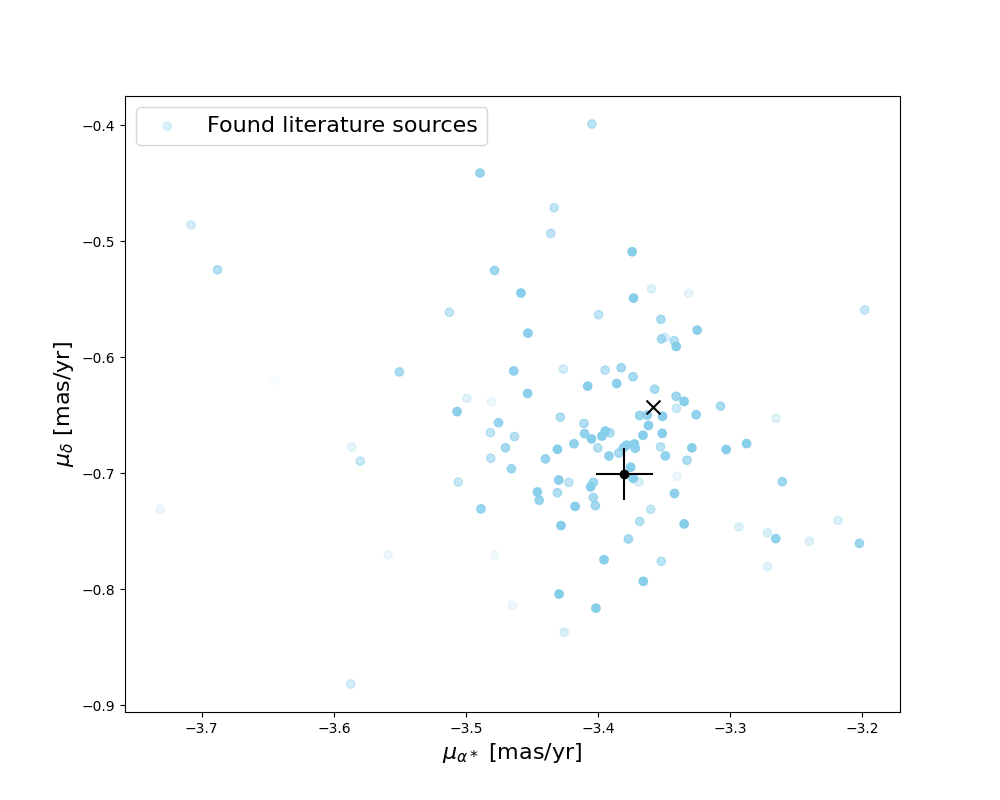

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(found.pmra, found.pmdec, color='skyblue', zorder=1, alpha=found.occurences,
             label='Found literature sources')

plt.errorbar(tot_not_found[correct_pm_mask].pmra, tot_not_found[correct_pm_mask].pmdec, fmt='o',
             xerr=tot_not_found[correct_pm_mask].pmra_error, yerr=tot_not_found[correct_pm_mask].pmdec_error,
             color='black')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

<IPython.core.display.Javascript object>


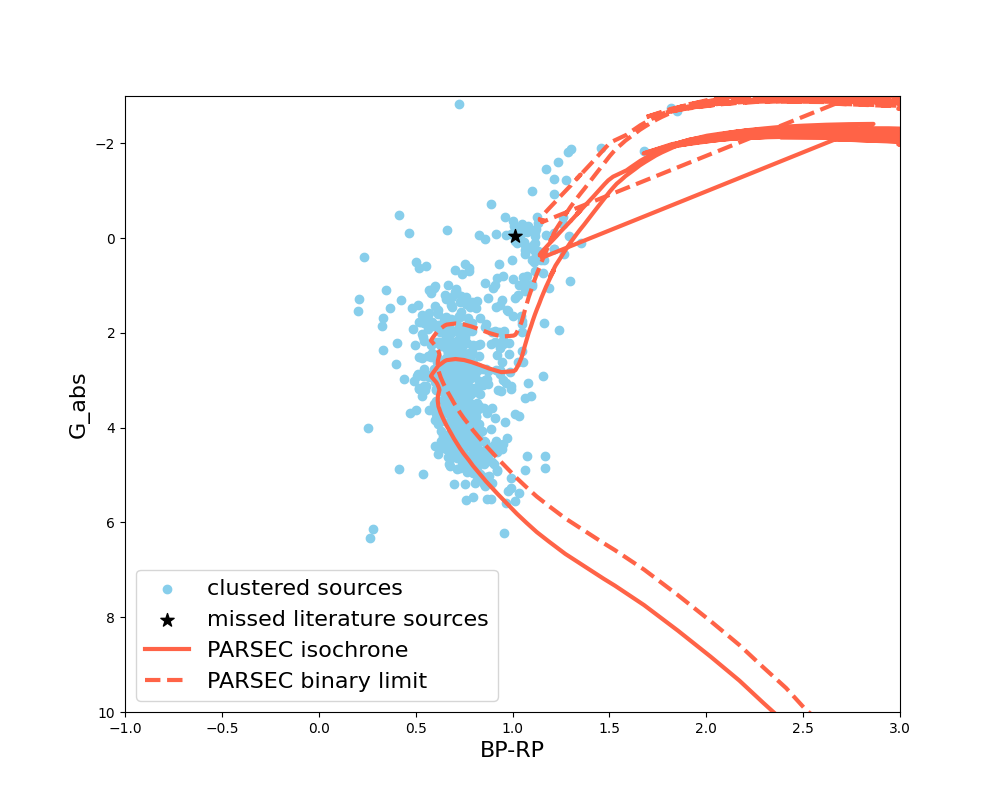

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(tot_not_found[correct_pm_mask]['BP-RP'], tot_not_found[correct_pm_mask]['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);